

# CSCI 3202, Spring 2020:  Assignment 5
### Due:  Friday 17 April 2020 by 11:59 PM

### Your name: Jason Nguyen

---



---
## Problem 1: Navigating an awkward situation with grace and poise

<img src='https://www.explainxkcd.com/wiki/images/5/5f/interaction.png' style="width: 600px;"/>


Suppose you are at a social event where you would like to avoid any interaction with a large number of the other attendees. It's not that you don't like them, it's just that you don't like *talking to* them. A few of your good friends are also in attendance, but they are tucked away in a corner. The rectangular room in which the event is being held spans gridcells at $x=1,2,\ldots, 6$ and $y=1,2,\ldots, 5$. At the eastern edge ($x=6$) of this first floor room, there is a balcony, with a 6-foot drop. If the event becomes unbearably awkward, you can jump off the balcony and run away. Of course, this might hurt a little bit, so we should incorporate this into our reward structure.

The terminal states and rewards associated with them are given in the diagram below. The states are represented as $(x,y)$ tuples. The available actions in non-terminal states include moving exactly 1 unit North (+y), South (-y), East (+x) or West (-x), although you should not include walking into walls, because that would be embarrassing in front of all these other people. Represent actions as one of 'N', 'S', 'E', or 'W'. For now, assume all non-terminal states have a default reward of -0.01, and use a discount factor of 0.99.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hw06_mdp.png" style="width: 400px;"/>

Use the following transition model for this decision process, if you are trying to move from state $s$ to state $s'$:
* you successfully move from $s$ to $s'$ with probability 0.6
* the remaining 0.4 probability is spread equally likely across state $s$ **and** all adjacent (N/S/E/W) states except for $s'$. Note that this does not necessarily mean that all adjacent states have 0.1, because some states do not have 4 adjacent states.


### (1a)

Complete the `MDP` class below. The docstring comments provide some desired specifications. You may add additional methods or attributes, if you would like.

In [133]:
import numpy as np
import pprint
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import unittest

In [134]:
class MDP:
    def __init__(self, nrow, ncol, terminal, default_reward, discount):
        '''Create/store the following attributes:
        states -- list of all the states (x,y) tuples
        terminal_states -- is a dictionary with terminal state keys, and rewards as values
        default_reward -- is the reward for being in any non-terminal state
        df -- discount factor
        ... and anything else you decide will be useful!
        '''
        
        # your code goes here...
        
        self.states = []
        for i in range(1,nrow+1):
            for j in range(1,ncol+1):
                self.states.append((j,i))
                
        self.terminal_states = terminal

        self.nrow = nrow
        self.ncol = ncol
        
        self.default_reward  = default_reward
        self.df = discount 

    def actions(self, state):
        '''Return a list of available actions from the given state.
        [None] are the actions available from a terminal state.
        '''
        
        # your code goes here...
        
        if state in self.terminal_states:
            return [None]
        else:
            x, y = state
            list_of_actions = ['N','S','E','W']
            if y == 1:
                list_of_actions.remove('S')
            if y == self.nrow:
                list_of_actions.remove('N')
            if x == 1:
                list_of_actions.remove('W')
            if x == self.ncol:
                list_of_actions.remove('E')   
            return list_of_actions
        
        
        
    def reward(self, state):
        '''Return the reward for being in the given state'''
        
        # your code goes here...
        
        if state in self.terminal_states:
            return self.terminal_states[state]
        else:
            return self.default_reward
        
        
        
        
    def result(self, state, action):
        '''Return the resulting state (as a tuple) from doing the given
        action in the given state, without uncertainty. Uncertainty
        is incorporated into the transition method.
        state -- a tuple representing the current state
        action -- one of N, S, E or W, as a string
        '''
    
        # your code goes here...
        x,y = state
        
        if action == 'N':
            y += 1
        if action == 'S':
            y -= 1
        if action == 'W':
            x -= 1
        if action == 'E':
            x += 1    
            
        return (x,y)
        
        
                
    def transition(self, state, action):
        '''Return the probabilities and subsequent states associated
        with taking the given action from the given state. Can be done
        however you want, so that it works with your value/policy iteration.
        '''
        
        # your code goes here...
        
        list_of_stuff = []
        
        list_of_stuff.append((0.6, self.result(state, action)))
        list_of_actions = self.actions(state)  
        
        if action is None:
            return[(0,state)]
            
        if state not in self.terminal_states:
            list_of_actions.append(None)                   
        
        
        for i in list_of_actions:
            if i != action:
                list_of_stuff.append((0.4/(len(list_of_actions)-1), self.result(state, i)))
                             
        return list_of_stuff
            
            

        
        
  
    

**Now:** create an `MDP` object to represent the decision process in this problem.

To test and get comfortable with your `MDP` class methods and attributes, and making the relevant calculations with this structure, calculate the expected utility of walking north from (1,1). Assume initially that all states $(x,y)$ have a utility of $x+y$ (including the terminal states).

In [239]:
#nrow, ncol, terminal, default_reward, discount
_MDP = MDP(nrow = 5, ncol = 6, 
           terminal = {(1,5):+2, (1,4):+2, (3,5):+1,
                       (3,1):-1, (2,1):-1, (1,3):-1, (4,3):-1, (3,4):-1, (4,4):-1, 
                       (6,1):-5, (6,2):-5, (6,3):-5, (6,4):-5, (6,5):-5 
                      },
           default_reward = -0.01,
           discount = 0.99
)

#expected utility = gamma * result

# print('Expected Utility: ', (_MDP.transition((1,1), 'N')[0][0]*((_MDP.result((1,1), 'N'))[0]*(_MDP.result((1,1), 'N'))[1])))

utility_old = {s: 0 for s in _MDP.states}
for s in _MDP.states:
    x, y = s
    utility_old[s] = x+y
    
s = (1,1)
    
next_states = _MDP.transition(s, 'N')

print(next_states)

numberr = sum([next_states[j][0]*utility_old[next_states[j][1]] for j in range(len(next_states))])

print(numberr)


[(0.6, (1, 2)), (0.2, (2, 1)), (0.2, (1, 1))]
2.8


#### Unit tests
Note that these are non-exhaustive, because there is some flexibility in how the `transition` method works.

In [136]:
tests_to_run = unittest.TestLoader().loadTestsFromModule(Tests_Problem1())
unittest.TextTestRunner().run(tests_to_run)

......
----------------------------------------------------------------------
Ran 6 tests in 0.004s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

### (1b)

Implement value iteration to calculate the utilities for each state.  Also implement a function that takes as arguments an `MDP` object and a dictionary of state-utility pairs (key-value) and returns a dictionary for the optimal policy.  The optimal policy dictionary should have state tuples as keys and the optimal move (None, N, S, E or W) as values.

In [131]:
def value_iteration(mdp, tol=1e-3):
    df = mdp.df
    states = mdp.states
    actions = mdp.actions
    transition = mdp.transition
    reward = mdp.reward

   # initilize utility for all states
    utility_new = {s : 0 for s in states}

    # iterate:
    while True:

        # make a copy of current utility estimate, to be modified
        utility_old = utility_new.copy()

        # initialize maximum change to 0
        max_change = 0

        # for each state s:
        for s in states:

            # for each available action, what next states
            # are possible, and their probabilities?
            next_states = [transition(s, a) for a in actions(s)]

            # calculate the maximum expected utility
            best_utility = -999
            for k in range(len(next_states)):
                newsum = sum([next_states[k][j][0]*utility_old[next_states[k][j][1]] for j in range(len(next_states[k]))])
                best_utility = max(best_utility, newsum)
#                 if len(next_states)==1:
#                     best_utility = newsum

            # new utility of s = reward(s) + 
            #                    discounted max expected utility
            utility_new[s] = reward(s) + df*best_utility

            # update maximum change in utilities, if needed
            max_change = max(max_change, abs(utility_new[s]-utility_old[s]))

        # if maximum change in utility from one iteration to the
        # next is less than some tolerance, break!
        if (df==1 and max_change < tol) or max_change < tol*(1-df)/df:
            break
            
    return utility_new
    
    

def find_policy(mdp, utility):
    df = mdp.df
    states = mdp.states
    actions = mdp.actions
    transition = mdp.transition
    reward = mdp.reward
    
    policy = {s : None for s in states}

    # loop over states to find the action that maximizes expected utility
    for s in states:

        # initialize the best utility to something very bad, so we can improve it
        best_utility = (-999, None)

        # loop over actions, find which gives the highest expected utility
        for a in actions(s):

            # calculate the expected utility of action a from state s
            newsum = sum([p*utility[s2] for p, s2 in transition(s,a)])

            # if this action has higher expected utility than the current best,
            # replace the best (utility, action) tuple with this one
            if newsum > best_utility[0]:
                best_utility = (newsum, a)

        # now we have the action (second element) that leads
        # to the highest expected utility (first element)
        policy[s] = best_utility[1]
        
    return policy
    
    # your code goes here...
    
utility = value_iteration(_MDP)
policy = find_policy(_MDP, utility)
# print(utility[(1,5)])
# print(utility[(6,1)])
# print(utility[(2,5)])
# print(utility[(5,3)])
# # print(policy[(2,4)])
# # print(policy[(1,1)])

for i in _MDP.states:
    print(i, utility[i])

for i in _MDP.states:
    print(i, policy[i])


(1, 1) -0.09657003336388732
(2, 1) -1.0
(3, 1) -1.0
(4, 1) -0.38079484410443204
(5, 1) -1.1662730263439314
(6, 1) -5.0
(1, 2) 0.21978431061032003
(2, 2) 0.5816849505064834
(3, 2) 0.30529963960689427
(4, 2) -0.05821162660130106
(5, 2) -0.8797515583494239
(6, 2) -5.0
(1, 3) -1.0
(2, 3) 0.9783086782999971
(3, 3) 0.44765775581928846
(4, 3) -1.0
(5, 3) -1.3900301151516992
(6, 3) -5.0
(1, 4) 2.0
(2, 4) 1.495877750733289
(3, 4) -1.0
(4, 4) -1.0
(5, 4) -1.2711103824653753
(6, 4) -5.0
(1, 5) 2.0
(2, 5) 1.736700293304454
(3, 5) 1.0
(4, 5) 0.41739460368503545
(5, 5) -0.6795559648148835
(6, 5) -5.0
(1, 1) N
(2, 1) None
(3, 1) None
(4, 1) N
(5, 1) W
(6, 1) None
(1, 2) E
(2, 2) N
(3, 2) W
(4, 2) W
(5, 2) W
(6, 2) None
(1, 3) None
(2, 3) N
(3, 3) W
(4, 3) None
(5, 3) S
(6, 3) None
(1, 4) None
(2, 4) W
(3, 4) None
(4, 4) None
(5, 4) N
(6, 4) None
(1, 5) None
(2, 5) W
(3, 5) None
(4, 5) W
(5, 5) W
(6, 5) None


Now actually use your `value_iteration` and `find_policy` functions to calculate the utility for each state in this MDP, and the optimal action in each state.

As a sanity check, print the utilities of these terminal states:
1. `utility[(1,5)]`
1. `utility[(6,1)]`

and print the utility of these states that are nearby to terminal states, so their utilities should be similar to the nearby terminal states' utilities:
1. `utility[(2,5)]`
1. `utility[(5,3)]`

And print the policy for these states to make sure they make sense:
1. `policy[(2,4)]`
1. `policy[(1,1)]`

In [126]:
print(utility[(1,5)])
print(utility[(6,1)])
print(utility[(2,5)])
print(utility[(5,3)])
print(policy[(2,4)])
print(policy[(1,1)])

2.0
-5.0
1.736700293304454
-1.3900301151516992
W
N


### (1c)

If we enter the room at (5,1), what is the optimal path for us to follow?  Create a graphic to illustrate this policy pathway, either by generating a plot in Python (like the maze solution path) or by uploading a hand-drawn image and including it below.

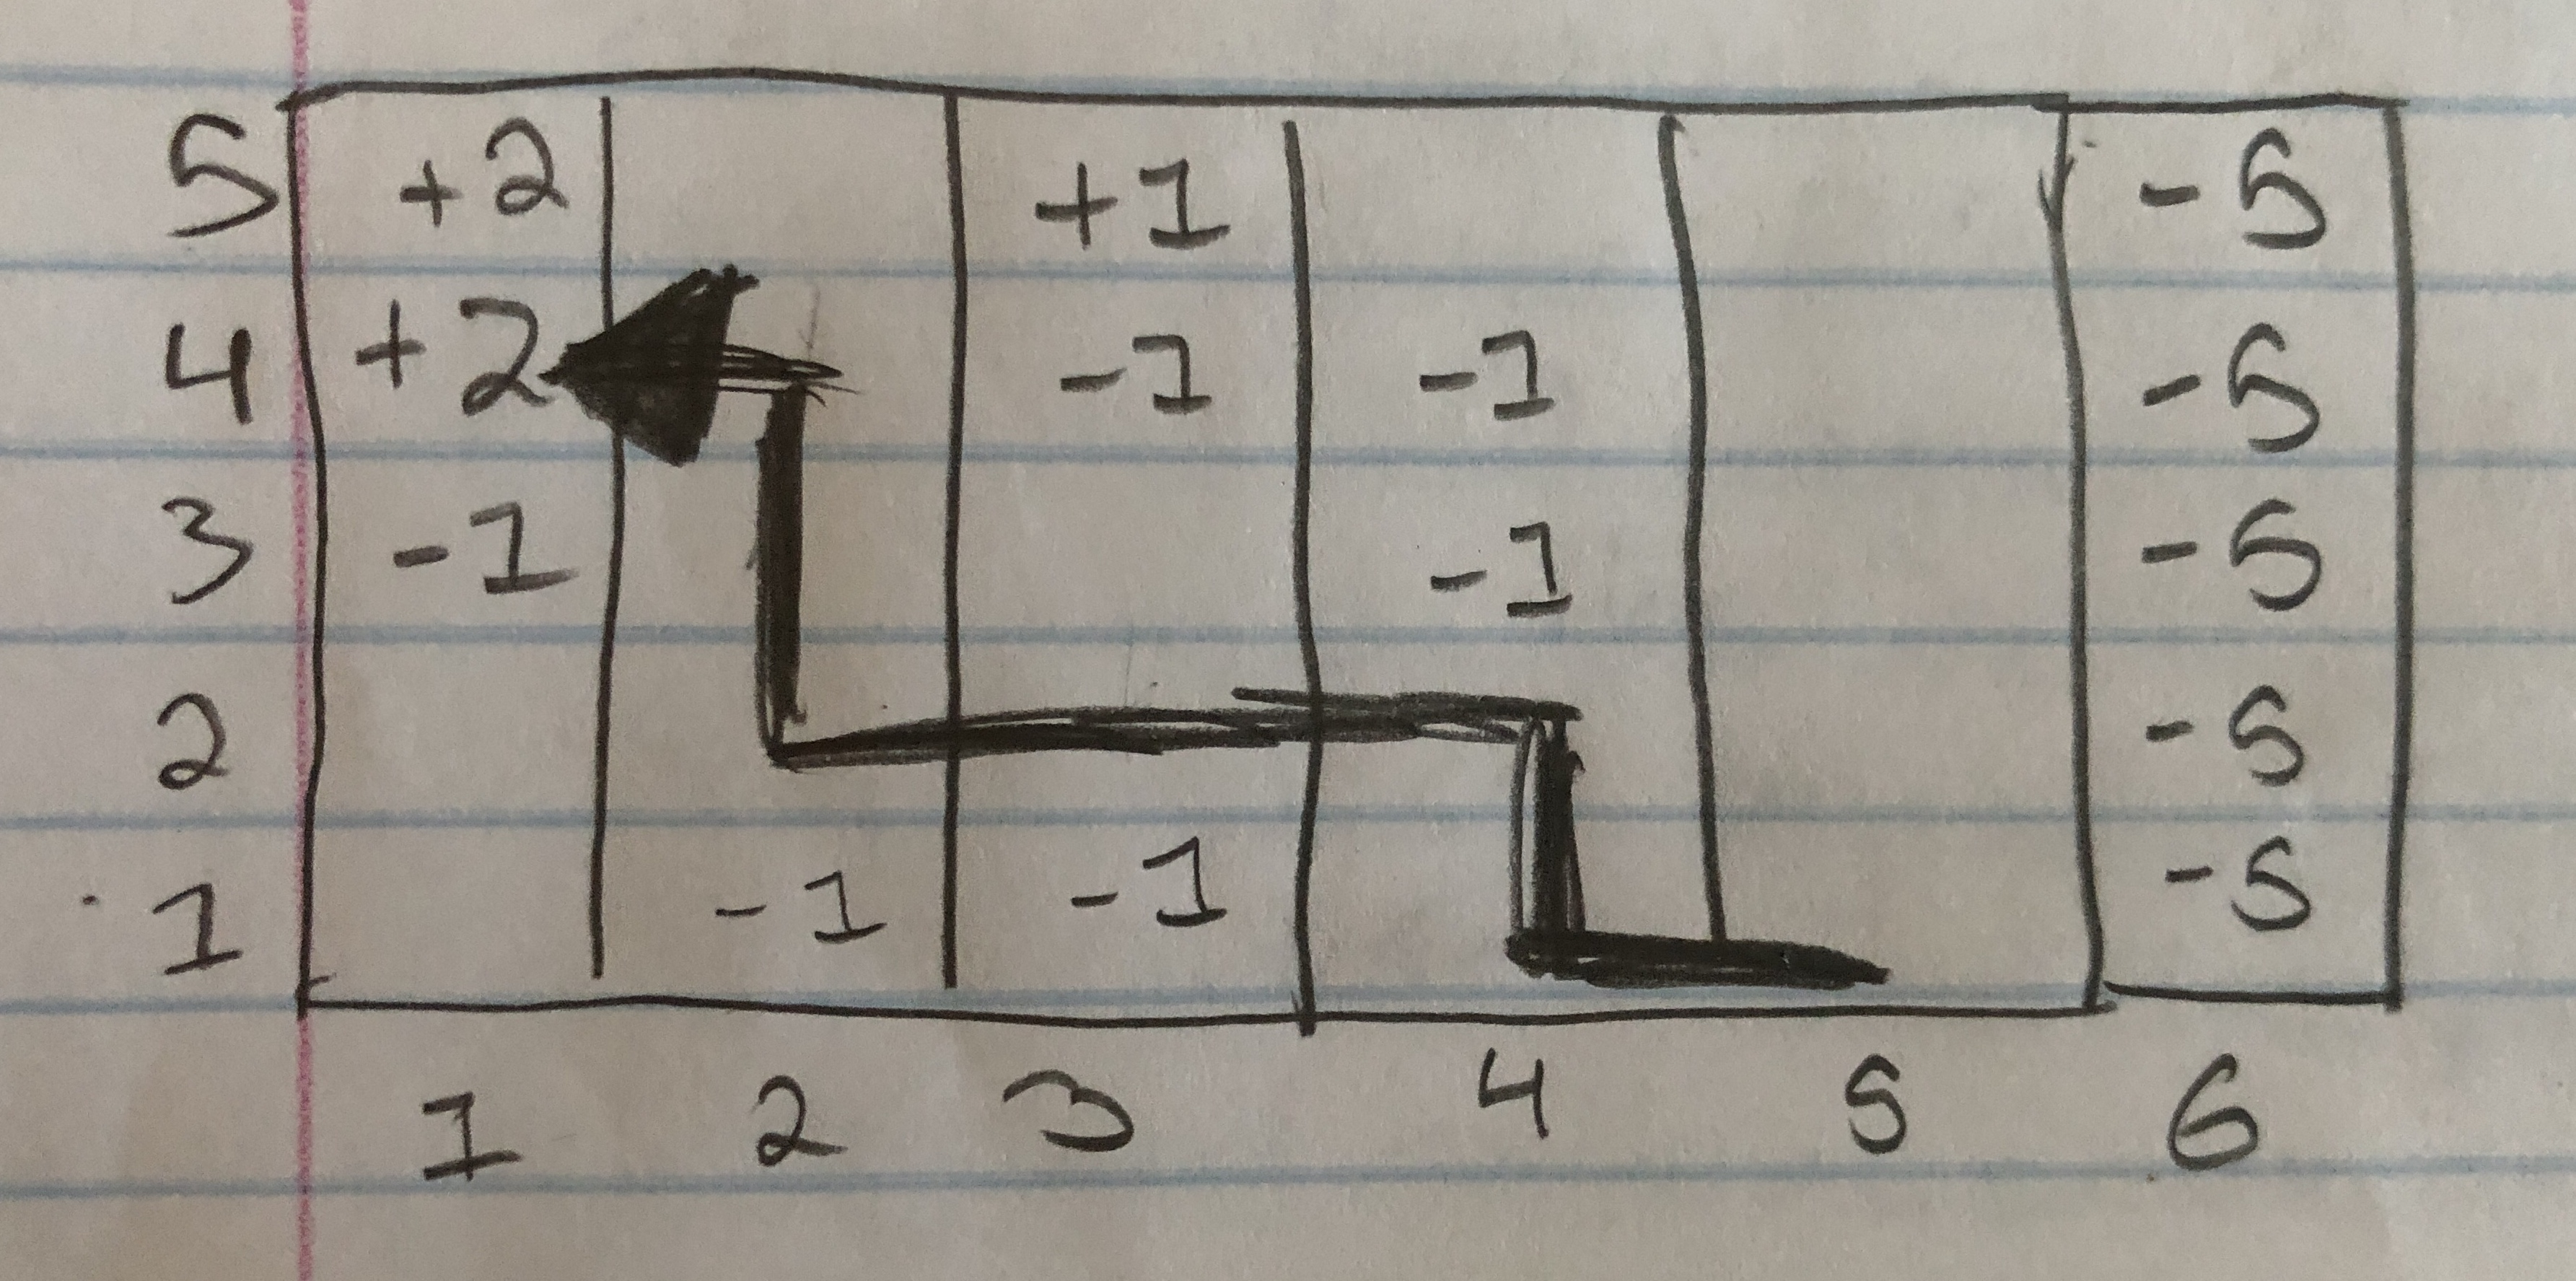

### (1d)

From (3,2) the optimal move is to walk West. If we are trying to go talk to our friends in the Northwest corner, why would we rather do this than walk North first, then West?

Keep in mind that there is the possibility of still moving to an unwanted node when on a desired path. You would do this because there is a smaller chance that your probability of accidentally running into the people on tiles (3,4) and (4,3). By moving west first you lower your chance of running into someone by half because there is only one person that you are directly next to. 

### (1e)

How painfully awkward do you need to set the default reward for non-terminal states before the optimal move from (5,1) becomes jumping off the balcony immediately and running away?  Round your answer to two decimal places.

In [246]:
print(policy[(5,1)])
default_reward = -0.5
while policy[(5,1)] != 'E':
    default_reward += -0.01
    _MDP = MDP(nrow = 5, ncol = 6, 
               terminal = {(1,5):+2, (1,4):+2, (3,5):+1,
                           (3,1):-1, (2,1):-1, (1,3):-1, (4,3):-1, (3,4):-1, (4,4):-1, 
                           (6,1):-5, (6,2):-5, (6,3):-5, (6,4):-5, (6,5):-5 
                          },
               default_reward = default_reward,
               discount = 0.99
    )
    print(default_reward)
    utility = value_iteration(_MDP)
    policy = find_policy(_MDP, utility)
    print(policy[(5,1)])
    
print(default_reward)

W
-0.51
W
-0.52
W
-0.53
W
-0.54
W
-0.55
W
-0.56
W
-0.5700000000000001
W
-0.5800000000000001
W
-0.5900000000000001
W
-0.6000000000000001
W
-0.6100000000000001
W
-0.6200000000000001
W
-0.6300000000000001
W
-0.6400000000000001
W
-0.6500000000000001
W
-0.6600000000000001
W
-0.6700000000000002
W
-0.6800000000000002
W
-0.6900000000000002
W
-0.7000000000000002
W
-0.7100000000000002
W
-0.7200000000000002
W
-0.7300000000000002
W
-0.7400000000000002
W
-0.7500000000000002
W
-0.7600000000000002
W
-0.7700000000000002
W
-0.7800000000000002
W
-0.7900000000000003
W
-0.8000000000000003
W
-0.8100000000000003
W
-0.8200000000000003
W
-0.8300000000000003
W
-0.8400000000000003
W
-0.8500000000000003
W
-0.8600000000000003
W
-0.8700000000000003
W
-0.8800000000000003
W
-0.8900000000000003
W
-0.9000000000000004
W
-0.9100000000000004
W
-0.9200000000000004
W
-0.9300000000000004
W
-0.9400000000000004
W
-0.9500000000000004
W
-0.9600000000000004
W
-0.9700000000000004
W
-0.9800000000000004
W
-0.9900000000000004
W
-1.0

The default reward would have to be -2.09.

### (1f)

In **1e** we assumed a certain level of loss (negative reward) just for being present.  But a more realistic approach might be to instead change the reward structure for the terminal states. Consider the terminal states with -1 reward in the default model. Let $R^*$ denote the reward associated with these states. How low does $R^*$ need to be in order for us to immediately jump off the balcony and run away? Use the default non-terminal state reward of -0.01. Write a few sentences interpreting your result.

In [247]:
_MDP = MDP(nrow = 5, ncol = 6, 
           terminal = {(1,5):+2, (1,4):+2, (3,5):+1,
                       (3,1):-1, (2,1):-1, (1,3):-1, (4,3):-1, (3,4):-1, (4,4):-1, 
                       (6,1):-5, (6,2):-5, (6,3):-5, (6,4):-5, (6,5):-5 
                      },
           default_reward = -0.01,
           discount = 0.99
          )

utility = value_iteration(_MDP)
policy = find_policy(_MDP, utility)
print(policy[(5,1)])

meannesspersoncounter = -1
while policy[(5,1)] != 'E':
    meannesspersoncounter += -0.01
    _MDP = MDP(nrow = 5, ncol = 6, 
               terminal = {(1,5):+2, (1,4):+2, (3,5):+1,
                           (3,1):meannesspersoncounter, (2,1):meannesspersoncounter, 
                           (1,3):meannesspersoncounter, (4,3):meannesspersoncounter, 
                           (3,4):meannesspersoncounter, (4,4):meannesspersoncounter, 
                           (6,1):-5, (6,2):-5, (6,3):-5, (6,4):-5, (6,5):-5 
                          },
               default_reward = -0.01,
               discount = 0.99
    )
    print(meannesspersoncounter)
    utility = value_iteration(_MDP)
    policy = find_policy(_MDP, utility)
    print(policy[(5,1)])
    
print(meannesspersoncounter)

W
-1.01
W
-1.02
W
-1.03
W
-1.04
W
-1.05
W
-1.06
W
-1.07
W
-1.08
W
-1.09
W
-1.1
W
-1.11
W
-1.12
W
-1.1300000000000001
W
-1.1400000000000001
W
-1.1500000000000001
W
-1.1600000000000001
W
-1.1700000000000002
W
-1.1800000000000002
W
-1.1900000000000002
W
-1.2000000000000002
W
-1.2100000000000002
W
-1.2200000000000002
W
-1.2300000000000002
W
-1.2400000000000002
W
-1.2500000000000002
W
-1.2600000000000002
W
-1.2700000000000002
W
-1.2800000000000002
W
-1.2900000000000003
W
-1.3000000000000003
W
-1.3100000000000003
W
-1.3200000000000003
W
-1.3300000000000003
W
-1.3400000000000003
W
-1.3500000000000003
W
-1.3600000000000003
W
-1.3700000000000003
W
-1.3800000000000003
W
-1.3900000000000003
W
-1.4000000000000004
W
-1.4100000000000004
W
-1.4200000000000004
W
-1.4300000000000004
W
-1.4400000000000004
W
-1.4500000000000004
W
-1.4600000000000004
W
-1.4700000000000004
W
-1.4800000000000004
W
-1.4900000000000004
W
-1.5000000000000004
W
-1.5100000000000005
W
-1.5200000000000005
W
-1.5300000000000005
W
-

N
-5.009999999999937
N
-5.0199999999999365
N
-5.029999999999936
N
-5.039999999999936
N
-5.049999999999936
N
-5.059999999999936
N
-5.0699999999999354
N
-5.079999999999935
N
-5.089999999999935
N
-5.099999999999935
N
-5.109999999999935
N
-5.119999999999934
N
-5.129999999999934
N
-5.139999999999934
N
-5.149999999999934
N
-5.1599999999999335
N
-5.169999999999933
N
-5.179999999999933
N
-5.189999999999933
N
-5.199999999999933
N
-5.2099999999999325
N
-5.219999999999932
N
-5.229999999999932
N
-5.239999999999932
N
-5.249999999999932
N
-5.259999999999931
N
-5.269999999999931
N
-5.279999999999931
N
-5.289999999999931
N
-5.2999999999999305
N
-5.30999999999993
N
-5.31999999999993
N
-5.32999999999993
N
-5.33999999999993
N
-5.3499999999999295
N
-5.359999999999929
N
-5.369999999999929
N
-5.379999999999929
N
-5.389999999999929
N
-5.399999999999928
N
-5.409999999999928
N
-5.419999999999928
N
-5.429999999999928
N
-5.439999999999928
N
-5.449999999999927
N
-5.459999999999927
N
-5.469999999999927
N
-5.479999

N
-9.059999999999851
N
-9.069999999999851
N
-9.07999999999985
N
-9.08999999999985
N
-9.09999999999985
N
-9.10999999999985
N
-9.11999999999985
N
-9.12999999999985
N
-9.13999999999985
N
-9.14999999999985
N
-9.15999999999985
N
-9.169999999999849
N
-9.179999999999849
N
-9.189999999999849
N
-9.199999999999848
N
-9.209999999999848
N
-9.219999999999848
N
-9.229999999999848
N
-9.239999999999847
N
-9.249999999999847
N
-9.259999999999847
N
-9.269999999999847
N
-9.279999999999847
N
-9.289999999999846
N
-9.299999999999846
N
-9.309999999999846
N
-9.319999999999846
N
-9.329999999999846
N
-9.339999999999845
N
-9.349999999999845
N
-9.359999999999845
N
-9.369999999999845
N
-9.379999999999844
N
-9.389999999999844
N
-9.399999999999844
N
-9.409999999999844
N
-9.419999999999844
N
-9.429999999999843
N
-9.439999999999843
N
-9.449999999999843
N
-9.459999999999843
N
-9.469999999999843
N
-9.479999999999842
N
-9.489999999999842
N
-9.499999999999842
N
-9.509999999999842
N
-9.519999999999841
N
-9.529999999999841
N

The negative weight at those nodes would have to be at -11.39 when your person just decides to jump off of the ledge. You notice in the decision making that it decides to go north for awhile and then it decides to jump off the ledge going east. This makes sense because your person finds the probability and risk of encountering one of these people much higher than the reward it might get from finding it's way to the friend nodes. It jumps the ledge when it reaches the threshold of the probability of accidentally running into one of the negative nodes.

### (1g)

Given the problem context, write a few sentences about why this is or is not an appropriate transition model. Include an interpretation of the terminal states.

You could make sense of this problem and that this is an appropriate transition model. If you are a person at a party and you hate talking to certain people but love talking to friends then the chances of you accidentally walking in an area that you don't want to could be the probability that one of these people rope you into a conversation that you dont want to be in. One of these people forcibly talking to you would mean that it is a negative reward to yourself. Therefore, having the transition model that this problem has does make sense. 

<br>

---

## Problem 2: HMMs

You are trying to diagnose whether your computer is broken or not. On a given day, your computer's hidden state is either *broken* or *working*. Each day you make one of the following observations: *blue-screen*, *slow*, or *snappy*, depending on the state of your computer. You decide to use the following HMM to model your daily observations. Note, "Emission Distribution" is another way to descibe the "Sensor Distribution".

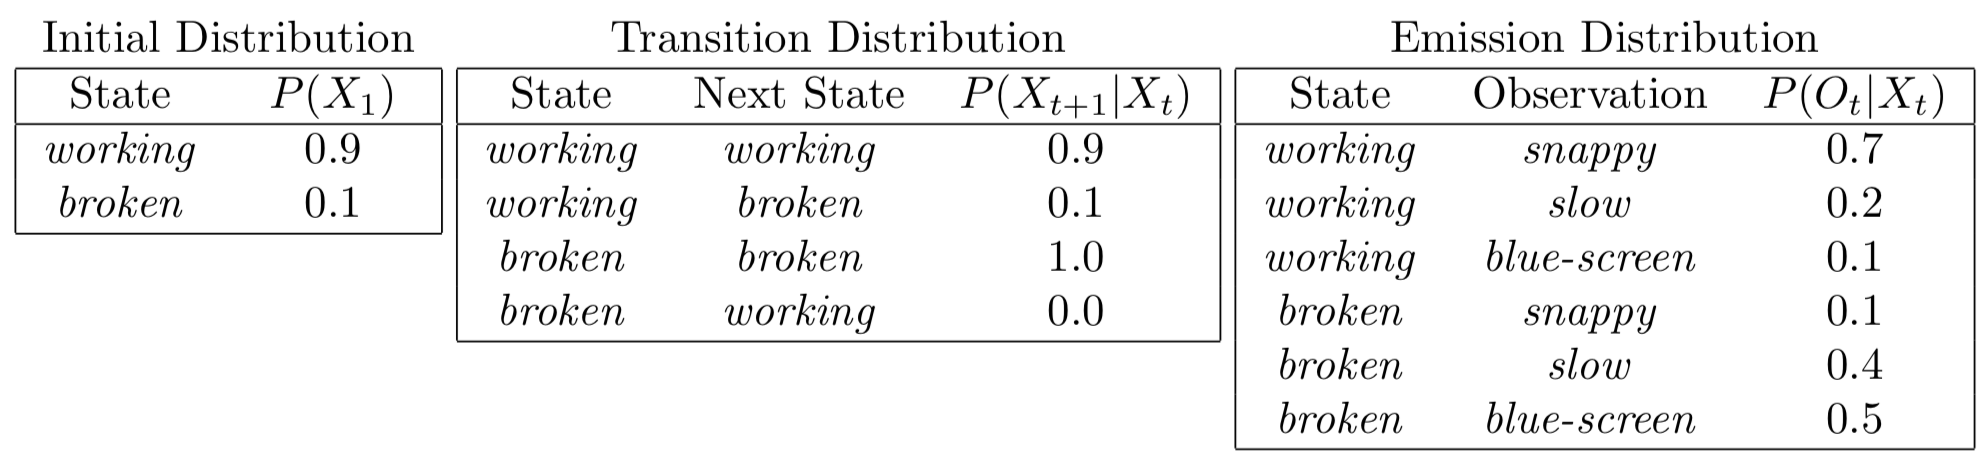


### (2a)
What is the posterior distribution of $X_1$, your computer's state on day one, given the observation (*slow*) on day 1? In other words, find $P(X_1 | E_1 = \textit{slow})$.

$P(X_1=working|E_1=slow) = (0.9)(0.2) = 0.18$
$P(X_1=broken|E_1=slow) = (0.1)(0.4) = 0.04$

Posterior probability of $P(X_1=broken|E_1=slow) = 18/22$

### (2b)
What is the posterior distribution of $X_2$, your computer's state on day two, given the observation sequence (*slow*, *slow*)?

$P(X_2=broken|slow,slow) = P(X_1=broken|slow)*P(X_2=broken|slow,X_1=broken) + P(X_1 = working|slow)P(X_2=broken|slow, X_1=working) = (2/11)*1*(2/5)*(9/11)*(1/10)*(2/5)=0.105
$ 


$P(X_2=working|slow,slow) = P(X_1=working|slow)*P(X_2=working|slow,X_1=broken) = (9/11)*(9/10)*(1/5)c= 0.147
$

The posterior for $X_2=broken|slow,slow$ is $0.105/0.147=0.416$

<br>

---

## Problem 3: your very own MDP

For this problem, you do not need to write any code, but rather communicate your ideas clearly using complete sentences and descriptions of the concepts the questions ask about. You can, of course, include some pseudocode if it helps, but that is not strictly necessary.

### (3a)

Describe something you think would be interesting to model using a Markov decision process.  Be **creative** - do not use any examples from your homework, class, or the textbook, and if you are working with other students, please **come up with your own example**. There are so, SO many possible answers!

I think it would be really fun to create a MDP that traverses the multitude of stages at a 3 day music festival. There are paths inbetween the stages, which we can think of as node. Just like a complex graph, the paths/edges can also have weights describing how far they are. Each path always being negative because you don't want to have to walk too far. Some nodes could also have negative weights because you don't want to have to walk past a stage that you don't like and get stuck at.

### (3b)

What are the states associated with your MDP?

The states with my MDP is your location at the music festival. Each stage is a state but also certain landmarks could be states. Most landmarks have a nuetral reward, maybe some more than others. 

### (3c)

What is the reward structure associated with your MDP?  Include a discussion of terminal/non-terminal states.

If the landmarks or stages have something you don't like such as bad music or weird art that some hippie made then they will have negative rewards. If the states have something you do like such as good music or a cheese curd vendor then they will have positive rewards.

Terminal nodes can be nodes that are so great that by entering them you want to stay at that node forever. They could also be nodes that are so bad that it makes you want to leave the festival immediately. Non-terminal nodes are more nuetral nodes that you can traverse and go inbetween without wanting to stay there or leave the festival.

### (3d)

What are the actions and transition model associated with your MDP?

The actions are your options to either stay where you are at or go to other nodes near you. Transition models can be like the one in question 1 of this homework where there is a possibility of not going to the desired direction. This can be interpreted by thinking if the person on the node was actually a group and there were certain people in the group that influenced the entire group to go certain ways that the majority of the group did not want to go. Having this uncertainty could influence a probability in going different directions than the desired direction.

### (3e)

Interpret what an optimal policy represents in the context of your particular MDP.

An optimal policy in my MDP would be a perfect arrangement of traversals on the graph/map of the festivals in which you gained the most enjoyment out of visiting the nodes/stages/landmarks on the path.

## Unit test

In [248]:
class Tests_Problem1(unittest.TestCase):
    def setUp(self):
        nrow = 3
        ncol = 3
        default_reward = -0.2
        discount = 0.5
        terminal = {(1,3):-1, (1,2):2}
        self.mdp = MDP(nrow, ncol, terminal, default_reward, discount)
    def test_actions_some(self):
        self.assertEqual(set(self.mdp.actions((2,2))) == {'N','S','E','W'}, True)
    def test_actions_few(self):
        self.assertEqual(set(self.mdp.actions((1,1))) == {'N','E'}, True)
    def test_actions_none(self):
        self.assertEqual(set(self.mdp.actions((1,2))) == {None}, True)
    def test_reward_t(self):
        self.assertEqual(self.mdp.reward((1,2)) == 2, True)
    def test_reward_nt(self):
        self.assertEqual(self.mdp.reward((2,2)) == -0.2, True)
    def test_result_nt(self):
        self.assertEqual(self.mdp.result((1,1), 'N') == (1,2), True)